<div style="text-align: right; font-size: 20px">Andrew Lee</div>
<div style="text-align: right; font-size: 20px">STAT 350 DL1</div>

<div style="text-align: center; font-size: 24px; font-weight: bold">Assignment #4</div>

<div style="text-align: center; font-size: 18px">Done in R for Extra Cred</div>

### Importing Necessary Libraries and Datasets

In [4]:
suppressMessages(library(magrittr))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(modelr))
suppressMessages(library(broom))
suppressMessages(library(infer))
suppressMessages(library(tibble))
suppressMessages(library(leaps))
suppressMessages(library(olsrr))
suppressMessages(library(repr))

fishery <- read.csv("fishery.csv")
pollution <- read.csv("pollution.csv")
sparrow <- read.csv("sparrow.csv")

### Problem 1 

#### a) According to the output of our correlation table, there is a moderate negative correlation between the **Area** of a fishery and the **Biomass**. As for the correlation between the explanatory variables, there seems to be weak negative correlation between **Species** and **Area**: there is not much collinearity within our data.

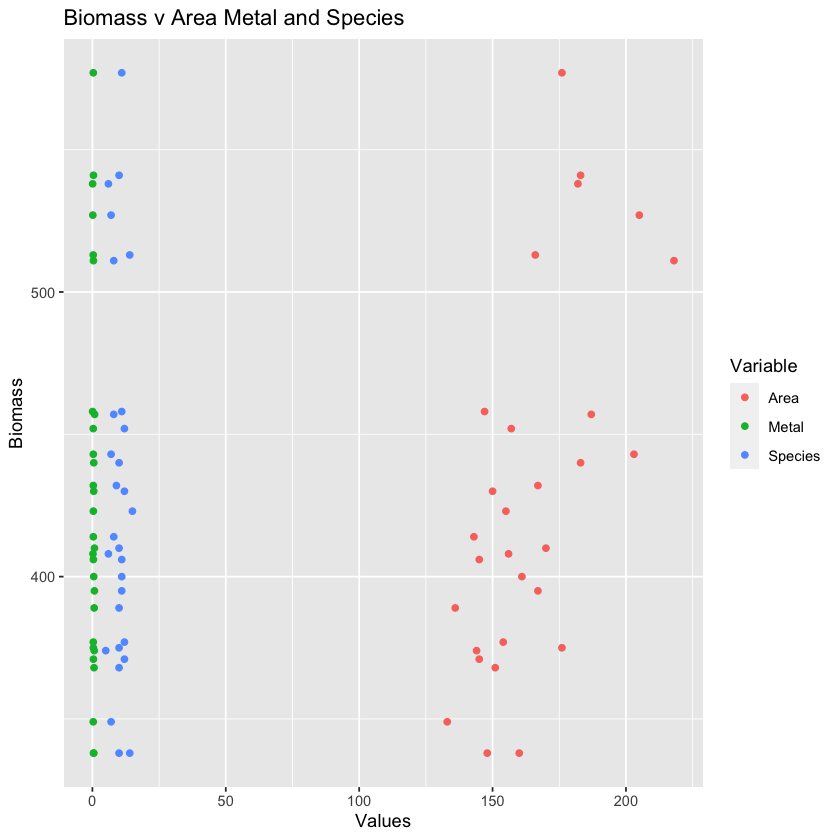

In [41]:
# Format the data so we can utilize one plot and plotting the data
pivot_longer(fishery, c(Metal, Species, Area), 
             names_to = "Variable", 
             values_to = "Values") %>%
ggplot(mapping = aes(x = Values, y = Biomass, color = Variable)) +
geom_point() +
labs(title = "Biomass v Area Metal and Species")

In [42]:
# Finding the correlation between each explanatory variable pair

fishery %>%
    select(Metal: Area) %>%
        cor(method = "pearson")
    

,Metal,Species,Area
Metal,1.00000000,0.03599677,-0.08942351
Species,0.03599677,1.00000000,-0.25491494
Area,-0.08942351,-0.25491494,1.00000000


In [43]:
# Finding the correlation between each explanatory vs response

fishery %>%
  select(Biomass, Metal:Area) %>%
      cor(method = "pearson") %>%
        as.data.frame() %>%
            select(Biomass) %>%
                tail(-1)


,Biomass
,<dbl>
Metal,-0.3678570
Species,-0.1118514
Area,0.6373746


#### b)

In [59]:
# Creating the fishery multiple regression model and output

fishery_mult_model_1 <- lm(Biomass ~ Metal + Species + Area, data = fishery)

fishery_mult_model_1 %>%
    tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),146.831928,93.4424948,1.5713614,0.1286704383
Metal,-105.303877,47.2725068,-2.2275924,0.0351422651
Species,1.509955,3.7442717,0.4032708,0.6901773303
Area,1.896737,0.4428711,4.2828209,0.0002389818


#### c) Our regression expression would be: **E(y) = 146.83 - 105.30 _Metal_ + 1.50 _Species_ + 1.89 _Area_**. Our area coefficient tells us for every 1 unit increase in _Area_, we will see a 1.89 increase within the _Biomass_.

#### d) Our QQplot of residuals tells us that our data is relatively normal as it follows a linear pattern. Our residual plots tells us that there is relative homoscedasticity within our data: there is somewhat constant variance.

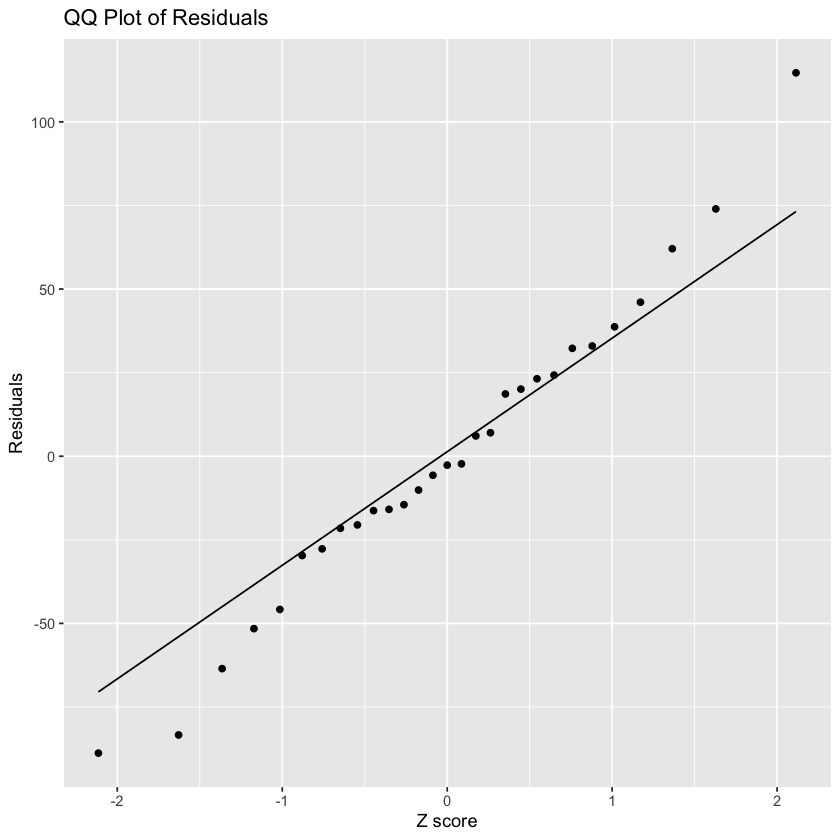

In [63]:
# Code for QQplot

ggplot(fishery, mapping = aes(sample = fishery_mult_model_1$residuals)) +
geom_qq() +
geom_qq_line() +
labs(x = "Z score",
    y = "Residuals",
    title = "QQ Plot of Residuals")

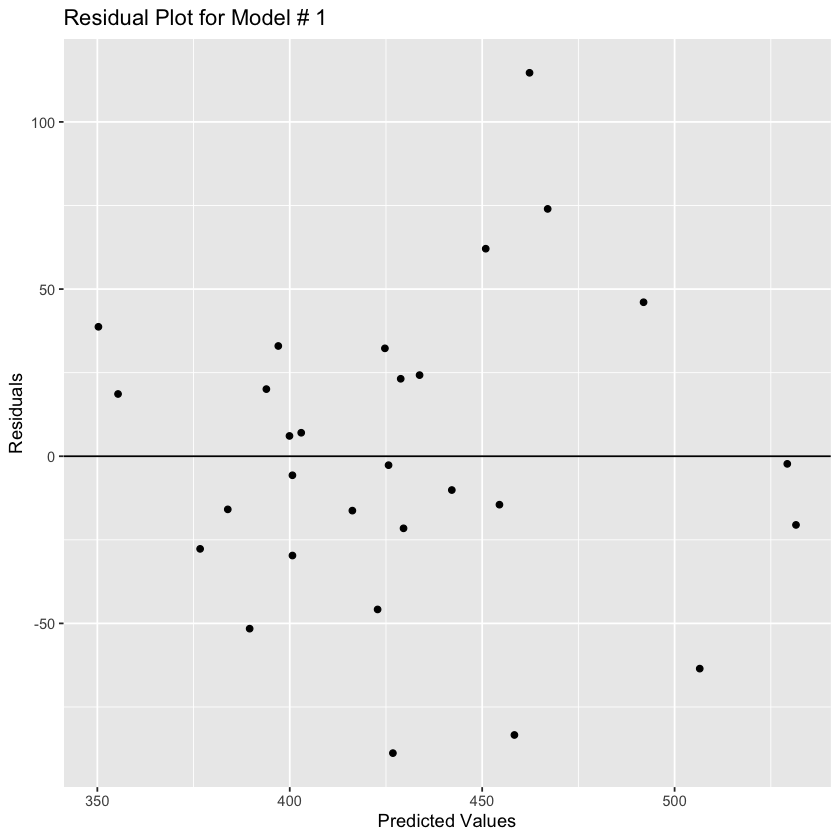

In [67]:
# Code for Residual Plot

ggplot(mapping = aes(x = fishery_mult_model_1$fitted.values, y = fishery_mult_model_1$residuals)) +
geom_point() +
geom_hline(yintercept = 0) +
labs(x = "Predicted Values",
     y = "Residuals",
     title = "Residual Plot for Model # 1")

#### e) Our adjusted R^2 tells us that approximately 44.7% of the variation is explained by our model; when only considering the significant independent variables.

In [71]:
# Showing the R^2 Value

fishery_mult_model_1 %>%
    glance() %>%
        select(adj.r.squared)

adj.r.squared
<dbl>
0.4476917


#### f) Our global F test statistic of 8.56 and low p-value of 0.0004 indicate that at least one of our independent variables has a significant linear relationship (differs from 0) with the dependent variable. This means that the regression model as a whole is statistically significant and provides a good fit to the data. However, it does not tell us which specific independent variable(s) are significant, so we need to look at the individual coefficients and their p-values to make that determination.

In [74]:
fishery_mult_model_1 %>%
    glance() %>%
        select(statistic, p.value)

statistic,p.value
<dbl>,<dbl>
8.565441,0.0004395435


#### g) Our Species (p value = 0.69) variable is not significant at the the alpha = 0.05 level: meaning it is (not significantly different from 0) not useful for building a model to predict Biomass. However our p values of 0.00002 and 0.03 for Area and Metal respectively are significant will be useful for building a model to predict Biomass (they differ from 0).

In [81]:
summary(fishery_mult_model_1)$coefficients[, c(1, 3, 4)]

,Estimate,t value,Pr(>|t|)
(Intercept),146.831928,1.5713614,0.1286704383
Metal,-105.303877,-2.2275924,0.0351422651
Species,1.509955,0.4032708,0.6901773303
Area,1.896737,4.2828209,0.0002389818


#### h)

In [87]:
# Create a variable containing the values we want to predict for: 

newdata <- data.frame(Metal = 0.303, Species = 14, Area = 166)

In [89]:
# Making the prediction interval:

pred <- predict(fishery_mult_model_1, newdata, interval = "prediction", level = 0.95)
pred

,fit,lwr,upr
1,450.9226,345.0519,556.7934


In [94]:
# Making the prediction interval:

conf <- predict(fishery_mult_model_1, newdata, interval = "confid", level = 0.95)
conf

,fit,lwr,upr
1,450.9226,412.2284,489.6169


#### i) Our equation would be E(y) = 169.09 - 105.04 _Metal_ + 1.85 _Area_. Our R^2 value is 0.465 both our explanatory variables (Metal and Area) are signifcant with their p values of 0.032 and 0.0001 respectively

In [108]:
# 2nd Model

fishery_mult_model_2 <- lm(Biomass ~ Metal + Area, data = fishery)

fishery_mult_model_2 %>%
    tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),169.090948,74.1740344,2.279651,0.0310740480
Metal,-105.042566,46.5006634,-2.258948,0.0325008044
Area,1.851575,0.4215212,4.392603,0.0001669653


In [113]:
# R^2 Adj

fishery_mult_model_2 %>%
    glance() %>%
        select(adj.r.squared)

adj.r.squared
<dbl>
0.4654797


#### j) Our equation would be E(y) = 111.02 + 1.93 _Area_. Our R^2 value is 0.384. Removing a variable from our regression model changes our R-squared value. If the variable being removed is not strongly correlated with the response variable or the other explanatory variables, removing it may not have much effect on the R-squared value. However, if the variable being removed is strongly correlated with the response variable or the other explanatory variables, removing it can result in a decrease in the R-squared value because it removes some of the explanatory power of the model. As such when we remove Metal we see a bigger effect on R^2 than when we remove Species.

In [115]:
# 3rd Model

fishery_mult_model_3 <- lm(Biomass ~ Area, data = fishery)

fishery_mult_model_3 %>%
    tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),111.024183,74.6770235,1.486725,0.1486729199
Area,1.936724,0.4506031,4.298070,0.0002003349


In [116]:
# R^2 Adj

fishery_mult_model_3 %>%
    glance() %>%
        select(adj.r.squared)

adj.r.squared
<dbl>
0.3842555


### Problem 2

#### a) All the levels of our Wing Length variable seem to have a moderate/strong positive linear correlation with the Weight Variable

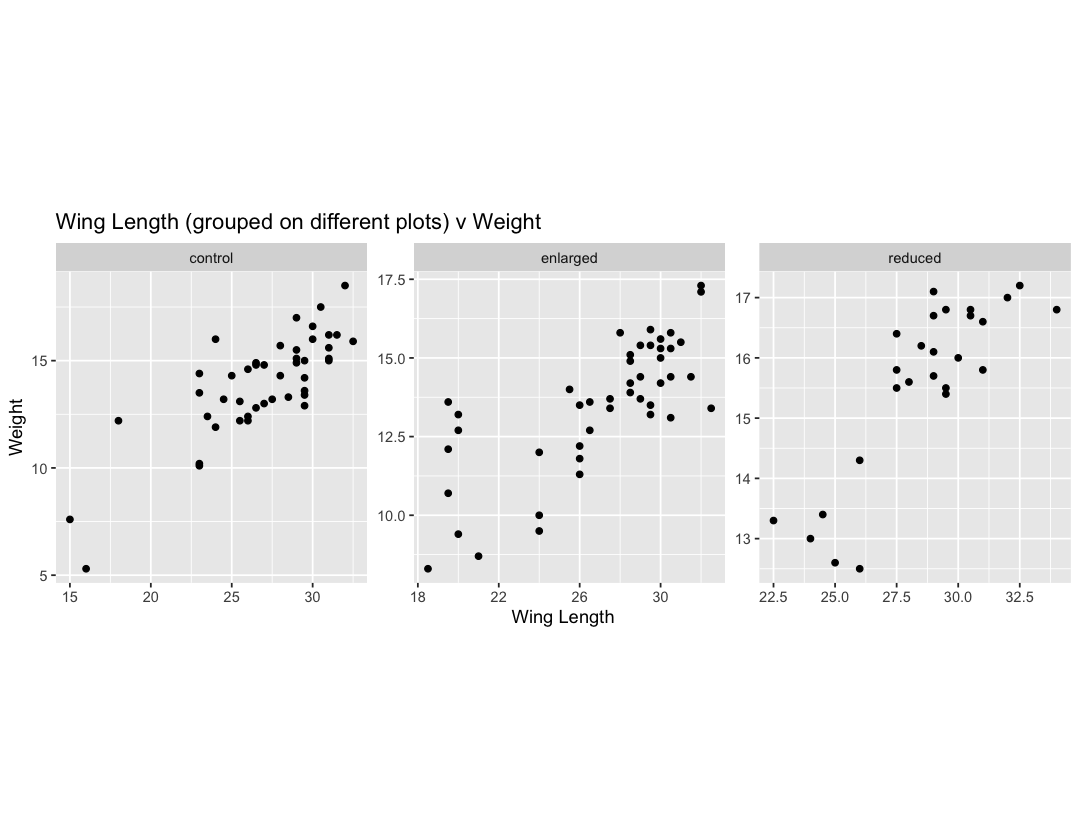

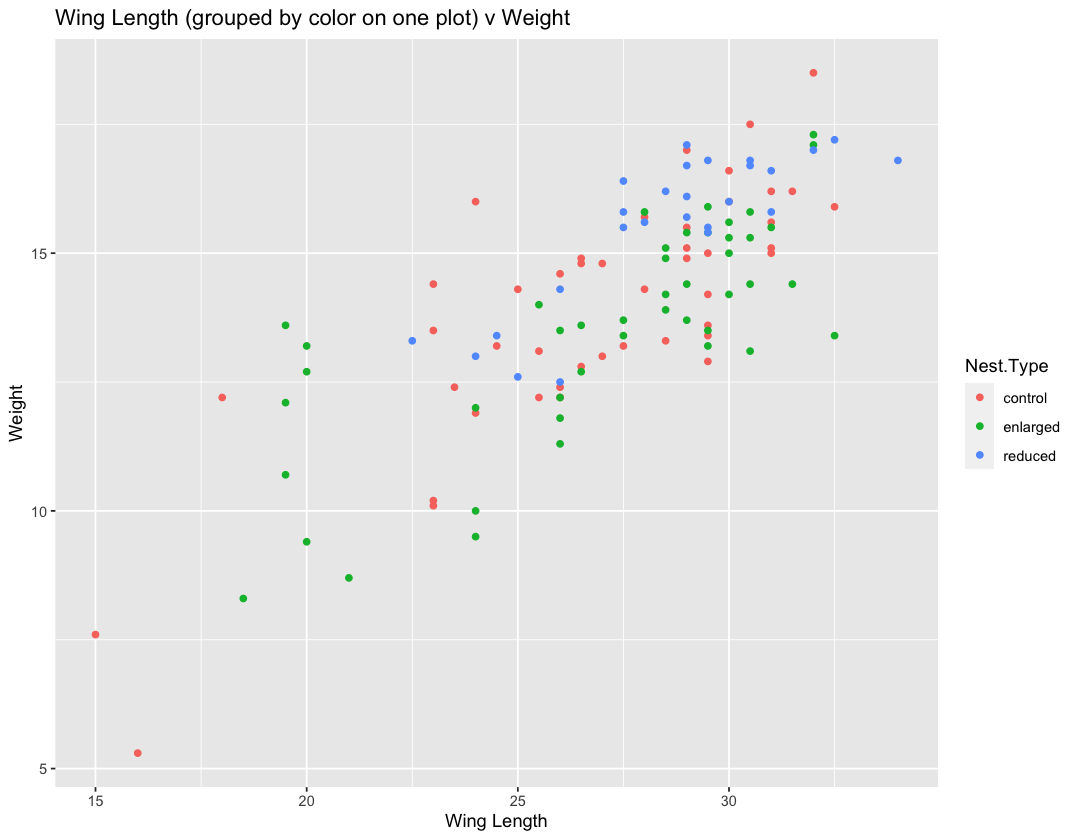

In [253]:
# Creating the Plots

ggplot(sparrow, mapping = aes(x = Wing.Length, y = Weight)) +
geom_point() +
facet_wrap(~ Nest.Type, scales = "free") +
labs(x = "Wing Length",
     title = "Wing Length (grouped on different plots) v Weight") +
theme(aspect.ratio = 1)

ggplot(sparrow, mapping = aes(x = Wing.Length, 
                              y = Weight, 
                              color = Nest.Type)) +
geom_point() +
labs(x = "Wing Length",
     title = "Wing Length (grouped by color on one plot) v Weight")


In [252]:
# Correlation

tables <- list()
unique_values_nest <- unique(sparrow$Nest.Type)

for (i in unique_values_nest) {
  f <- sparrow %>% 
    filter(Nest.Type == i) %>% 
    select(Wing.Length, Weight) %>% 
    cor(method = "pearson")
  
  tables[[i]] <- f
}

total <- sparrow %>%
    select(Wing.Length, Weight) %>%
        cor(method = "pearson")

tables[[total_ind <- length(unique_values_nest) + 1]] <- total
names(tables)[length(tables)] <- "total"

tables

,Wing.Length,Weight
Wing.Length,1.0000000,0.8059326
Weight,0.8059326,1.0000000
,Wing.Length,Weight
Wing.Length,1.0000000,0.7528946
Weight,0.7528946,1.0000000
,Wing.Length,Weight
Wing.Length,1.0000000,0.8412294
Weight,0.8412294,1.0000000
,Wing.Length,Weight
Wing.Length,1.000000,0.783512


#### b) Our R^2 is 0.613 and our model is Weight = 1.365490 + 0.467404 * Wing Length

In [40]:
simple_wing_model <- lm(Weight ~ Wing.Length, data = sparrow)

simple_wing_model %>%
    tidy()

simple_wing_model %>%
    glance() %>%
        select(statistic, p.value, r.squared)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.365490,0.95730874,1.426384,1.564905e-01
Wing.Length,0.467404,0.03471756,13.463042,2.621940e-25


statistic,p.value,r.squared
<dbl>,<dbl>,<dbl>
181.2535,2.62194e-25,0.6138911


#### c) Our slope's p value of <0.001 tells us that our Wing Length's slope coefficient differs from 0 and as such will be meaningful to use in our model.

In [11]:
simple_wing_model %>%
  tidy() %>%
    mutate(p.value = format(p.value, scientific = FALSE))
        

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),1.365490,0.95730874,1.426384,0.156490480726554970214436934839
Wing.Length,0.467404,0.03471756,13.463042,0.000000000000000000000000262194


#### d)

In [13]:
# Storing the values for values we want to test for

newdata <- data.frame(Wing.Length = 33)


In [14]:
# Prediction interval

pred_sparrow <- predict(simple_wing_model, newdata, interval = "prediction", level = 0.95)

pred_sparrow

,fit,lwr,upr
1,16.78982,13.97803,19.60161


In [15]:
# Prediction interval

conf_sparrow <- predict(simple_wing_model, newdata, interval = "confidence", level = 0.95)

conf_sparrow

,fit,lwr,upr
1,16.78982,16.32192,17.25772


#### e) Our gloabl F test static of 8.12 and p value of 0.0005 tells us that our model has at least one Betas is significant (different from 0)

In [38]:
# Create indicator variables for the "enlarged" and "reduced" nest types

sparrow$enlarged <- ifelse(sparrow$Nest.Type == "enlarged", 1, 0)
sparrow$reduced <- ifelse(sparrow$Nest.Type == "reduced", 1, 0)

# Fit the multiple regression model

sparrow_mult_model_1 <- lm(Weight ~ enlarged + reduced, data = sparrow)

# Print the summary of the model

sparrow_mult_model_1 %>%
    tidy()

sparrow_mult_model_1 %>%
    glance() %>%
        select(statistic, p.value, adj.r.squared)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),13.9244444,0.3153302,44.1582914,4.137314e-73
enlarged,-0.4088889,0.4459443,-0.9169057,3.611448e-01
reduced,1.6447863,0.5210845,3.1564679,2.047543e-03


statistic,p.value,adj.r.squared
<dbl>,<dbl>,<dbl>
8.128795,0.0005031122,0.1103037


#### f) The intercept represents the estimated mean weight for the control nests, which is 13.92 grams. The coefficient for the enlarged nests variable is -0.41. This means that, on average, sparrows from enlarged nests weigh 0.41 grams less than sparrows from control nests. However, this coefficient is not statistically significant since the p-value is 0.361, which is greater than the standard significance level of 0.05. Therefore, we cannot reject the null hypothesis that the coefficient is zero. The coefficient for the reduced nests variable is 1.64. This means that, on average, sparrows from reduced nests weigh 1.64 grams more than sparrows from control nests. This coefficient is statistically significant since the p-value is 0.002, which is less than the standard significance level of 0.05. Therefore, we can reject the null hypothesis that the coefficient is zero and conclude that there is a significant positive relationship between the reduced nests variable and sparrow weight.

#### g) Our adjusted R^2 is 0.1103037, which is slightly lower than the R2 of 0.1257767. This is because the adjusted R^2 takes into account the number of explanatory variables in the model and penalizes the R^2 value for including irrelevant variables. Since the model includes only two indicator variables, it is not surprising that the difference between the R^2 and adjusted R^2 is small.

In [32]:
# Viewing R^2

sparrow_mult_model_1 %>%
    glance() %>%
        select(adj.r.squared, r.squared)

adj.r.squared,r.squared
<dbl>,<dbl>
0.1103037,0.1257767


#### h) The first adjusted R-squared value of 0.6138911 corresponds to the simple linear regression model with only the wing length as the explanatory variable. This means that the model accounts for approximately 61.3% of the variation in weight, without adjusting for the degrees of freedom and number of explanatory variables. Comparing these values, we can see that the multiple regression model that includes both the wing length and the two indicator variables has a higher adjusted R-squared value than the other two models.

#### The second R-squared value of 0.1257767 corresponds to the simple linear regression model with only the two indicator variables as explanatory variables. This means that the model accounts for approximately 12.6% of the variation in weight, without adjusting for the degrees of freedom and number of explanatory variables. 

#### The third R-squared value of 0.6650105 corresponds to the multiple regression model that includes both the wing length and the two indicator variables as explanatory variables. This means that the model accounts for approximately 66.5% of the variation in weight, adjusting for the degrees of freedom and number of explanatory variables. This indicates that the multiple regression model provides a better fit to the data than the other two models.

In [41]:
#Creating and Viewing the model

model <- lm(Weight ~ Wing.Length + enlarged + reduced, data = sparrow)

model %>%
    tidy()

# R^2 Comparison
simple_wing_model %>%
    glance() %>%
        select(adj.r.squared)

sparrow_mult_model_1 %>%
    glance() %>%
        select(adj.r.squared)

model %>%
    glance() %>%
        select(adj.r.squared)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.9424368,0.91366043,2.125994,3.570036e-02
Wing.Length,0.4454278,0.03317381,13.427093,4.465192e-25
enlarged,-0.4583809,0.27730237,-1.653000,1.011314e-01
reduced,0.8978382,0.32873938,2.731155,7.333842e-03


adj.r.squared
<dbl>
0.6105042


adj.r.squared
<dbl>
0.1103037


adj.r.squared
<dbl>
0.6560376


#### i) To predict the weight at wing length 33 from each level of the "type of nest" variable using the multiple regression model, we can use the following equation: Weight = 1.9424368 + 0.4454278 * Wing.Length - 0.4583809 * Enlarged + 0.8978382 * Reduced Where Enlarged and Reduced are indicator variables representing the type of nest. 

#### To predict the weight for the Enlarged nest, we set Enlarged to 1 and Reduced to 0, and substitute Wing.Length = 33 in the above equation: Weight_Enlarged = 1.9424368 + 0.4454278 * 33 - 0.4583809 * 1 + 0.8978382 * 0 = 16.1831733 So, the predicted weight for the Enlarged nest at wing length 33 is 16.1831733. 

#### To predict the weight for the Reduced nest, we set Reduced to 1 and Enlarged to 0, and substitute Wing.Length = 33 in the above equation: Weight_Reduced = 1.9424368 + 0.4454278 * 33 - 0.4583809 * 0 + 0.8978382 * 1 = 17.5393924 So, the predicted weight for the Reduced nest at wing length 33 is 17.5393924. 

#### When both are = to zero (our control group) our prediction is 1.9424368 + 0.4454278 * 33 = 16.6415542 

### Problem 3

#### a) Our equation is SO2 = 100.15 - 1.12(Temp) + 0.06(Manuf) - 0.04(Pop) - 3.08(Wind) + 0.42(Precip)

#### The linear regression model with predictors of temperature, manufacturing, population, wind, and precipitation, and an intercept term had an R-squared value of 0.5927, indicating that these predictors explain about 59% of the variation in SO2 levels. The estimates and standard errors for each predictor indicate that manufacturing and population are both statistically significant predictors, while temperature and wind have weaker but still potentially relevant relationships with SO2 levels. Precipitation does not appear to be a significant predictor.

In [90]:
# Fit a stepwise regression model
stepwise_model_both <- lm(SO2 ~ Temp + Manuf + Pop + Wind + Precip + Days, data = pollution)

stepwise_model_both_1 <- step(stepwise_model_both, direction = "both", trace = FALSE)

In [91]:
# Display Model

stepwise_model_both_1 %>%
    tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),100.15245028,30.27520537,3.308068,0.0021815482
Temp,-1.12128778,0.41586334,-2.696289,0.0107069720
Manuf,0.06488713,0.01554490,4.174175,0.0001880731
Pop,-0.03933466,0.01493655,-2.633450,0.0124986514
Wind,-3.08239960,1.76562312,-1.745786,0.0896221131
Precip,0.41946813,0.21624466,1.939785,0.0604983333


#### b) Our model changed as an additional variable was added to our model

In [89]:
# Fit a stepwise regression model
stepwise_model_forward <- lm(SO2 ~ Temp + Manuf + Pop + Wind + Precip + Days, data = pollution)

stepwise_model_forward_1 <- step(stepwise_model_forward, direction = "forward", trace = FALSE)

stepwise_model_forward_1 %>%
    tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),111.72848064,47.31810073,2.361221,0.0240867374
Temp,-1.26794109,0.62117952,-2.041183,0.0490557189
Manuf,0.06491817,0.01574825,4.122245,0.0002277862
Pop,-0.03927674,0.01513274,-2.595482,0.0138461970
Wind,-3.18136579,1.81501910,-1.752800,0.0886503978
Precip,0.51235896,0.36275507,1.412410,0.1669175999
Days,-0.05205019,0.16201386,-0.321270,0.7499724652


#### c) The model selected by the backwards stepwise regression was the 2nd best model subset. The regular stepwise regression produced the best model.

In [16]:
# Subset Model

subset_model <- lm(SO2 ~ Temp + Manuf + Pop + Wind + Precip + Days, data = pollution)

model_compare_subsets <- ols_step_all_possible(subset_model)

model_compare_subsets %>%
  arrange(desc(adjr)) %>%
      slice(1:5) %>%
        select(predictors, adjr)

    

predictors,adjr
<chr>,<dbl>
Temp Manuf Pop Wind Precip,0.6211526
Temp Manuf Pop Wind Precip Days,0.6111904
Temp Manuf Pop Wind Days,0.6001381
Temp Manuf Pop Precip,0.5996029
Temp Manuf Pop Wind,0.5920786


# **OPEN ENDED QUESTION:**

### FINAL MODEL: It seems like our best model would simply be the one that we obtained in our first stepwise regression as it not only has a higher adj R^2 of 0.62 (compared to 0.59) but also because it is not significantly different from models with additional parameters added (F test p value = 0.92)

In [41]:
pollution$Pop_Manuf <- pollution$Pop * pollution$Manuf

final <- lm(SO2 ~ Temp + Manuf + Pop + Wind + Precip + Pop_Manuf + manuf2, data = pollution)
best_stepwise <- lm(SO2 ~ Temp + Manuf + Pop + Wind + Precip, data = pollution)


final %>% 
    glance()

best_stepwise %>%
    glance()

anova(final, best_stepwise)


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6699645,0.599957,14.84597,9.569892,1.918387e-06,7,-164.3335,346.667,362.0892,7273.29,33,41


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6685085,0.6211526,14.44732,14.11668,1.409372e-07,5,-164.4238,342.8475,354.8425,7305.376,35,41


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,33,7273.290,NA,NA,NA,NA
2,35,7305.376,-2,-32.08623,0.07278999,0.9299449


## THINGS TO CONSIDER

### _Interactions_
#### - It's possible that "Manuf" has a stronger positive effect on "SO2" in areas with high population density, while the effect is weaker in areas with low population density. This could be due to factors such as different types of manufacturing facilities, varying levels of regulation, or different environmental conditions in areas with different population densities.

### _Higher Order_
#### - As number of manufacturing enterprises employing 20 or more goes up, the factories used are likely to grow in size as well. As such we could see a quadratic like impact on SO2 levels